# Problema 4

Este bloque de código define funciones para realizar la estimación del kernel usando un ancho de banda óptimo.

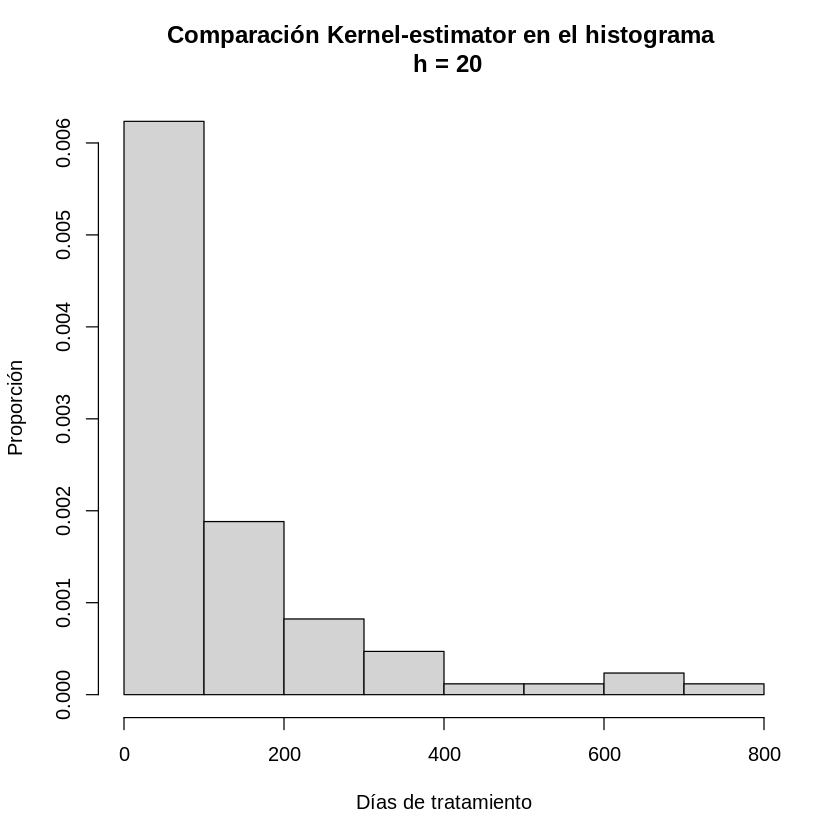

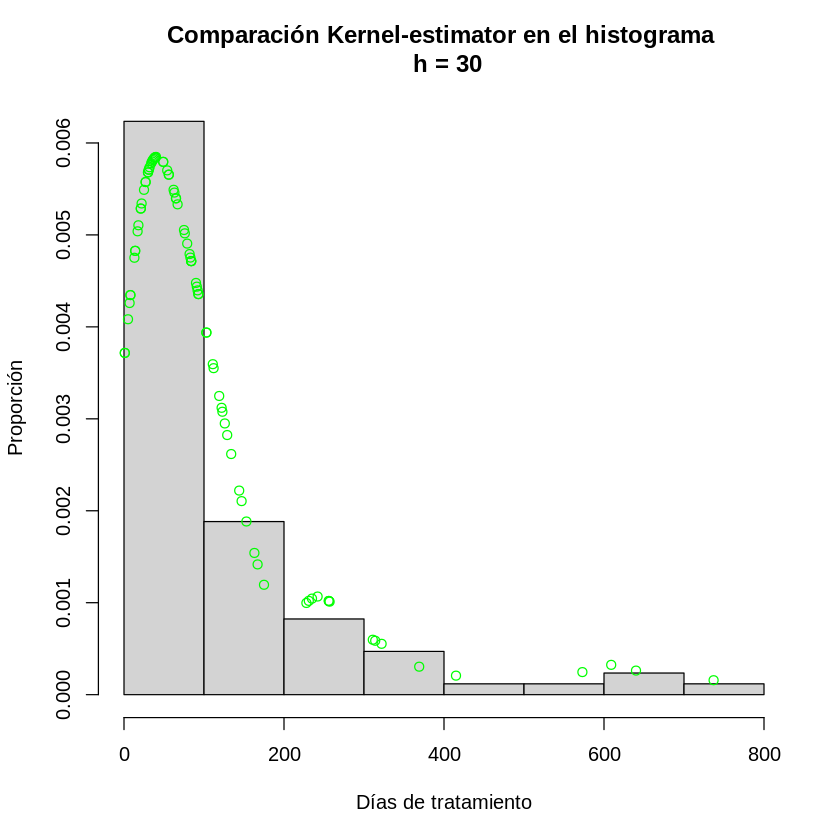

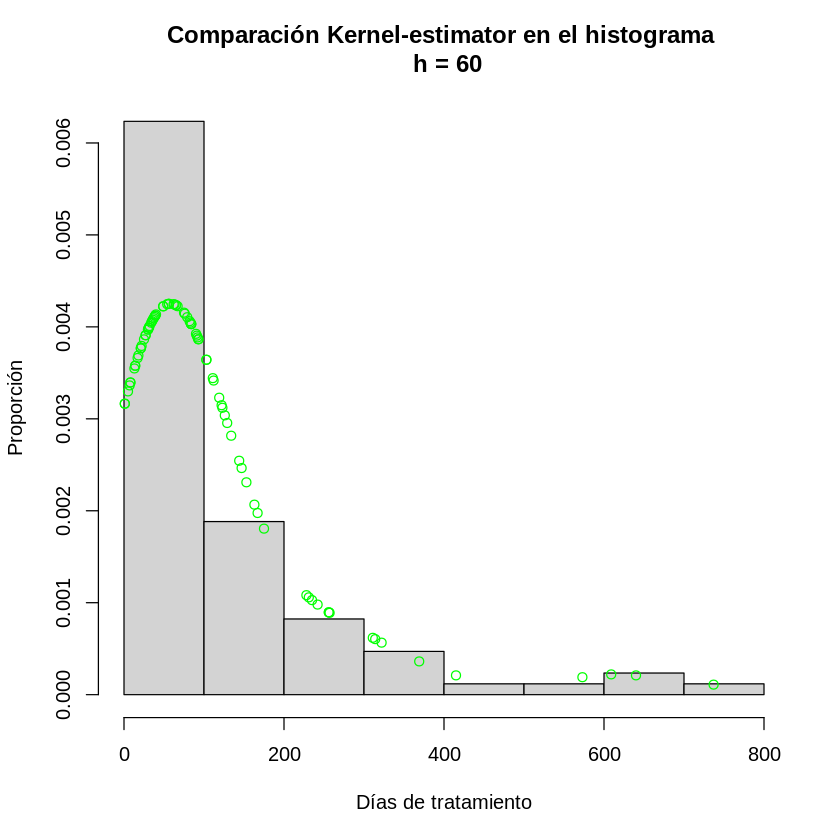

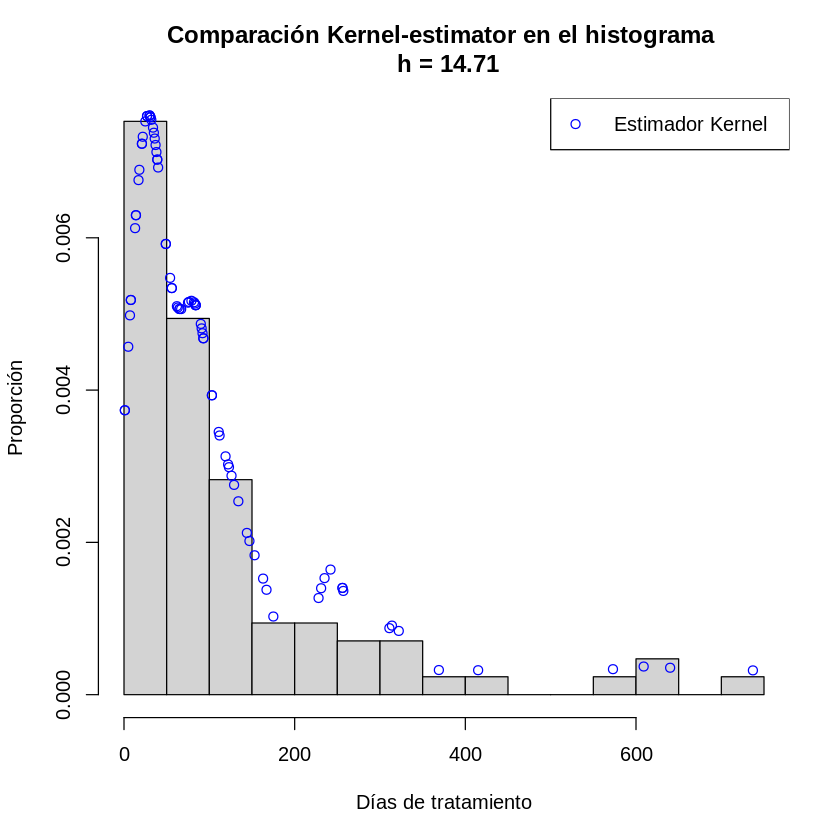

In [4]:
gaussian_kernel <- function(u)
{
  return((1/sqrt(2*pi)) * exp(-0.5 * u^2))
}
kernel_estimator <- function(x,h,kernel,data)
{
  n <- length(data)
  estimated <- sum(sapply(data, function(xi) kernel((x - xi)/h)))
  return((1/(n*h)) * estimated)
}

data <- read.csv("Tratamiento.csv")

#Para h = 20

h <- 0.025
x <- data$X1
estimacion <- c()

for (i in seq_along(x))
{
  estimacion[i] <- kernel_estimator(x[i], h, gaussian_kernel, data$X1)
}

hist(x, probability = T ,xlab = "Días de tratamiento", ylab = "Proporción",  main = "Comparación Kernel-estimator en el histograma \n h = 20")
points(x,estimacion, col= "green")




#Para h = 30


h <- 30
x <- data$X1
estimacion <- c()

for (i in seq_along(x))
{
  estimacion[i] <- kernel_estimator(x[i], h, gaussian_kernel, data$X1)
}

hist(x, probability = T ,xlab = "Días de tratamiento", ylab = "Proporción",  main = "Comparación Kernel-estimator en el histograma \n h = 30")
points(x,estimacion, col = "green")


#Para h = 60


h <- 60
x <- data$X1
estimacion <- c()

for (i in seq_along(x))
{
  estimacion[i] <- kernel_estimator(x[i], h, gaussian_kernel, data$X1)
}

hist(x, probability = T ,xlab = "Días de tratamiento", ylab = "Proporción", main = "Comparación Kernel-estimator en el histograma \n h = 60")
points(x,estimacion, col = "green")

#Optimizado

h <- 14.7194
x <- data$X1
estimacion <- c()

for (i in seq_along(x))
{
  estimacion[i] <- kernel_estimator(x[i], h, gaussian_kernel, data$X1)
}

hist(x, probability = T, breaks = 12 ,xlab = "Días de tratamiento", ylab = "Proporción", main = "Comparación Kernel-estimator en el histograma \n h = 14.71")
points(x,estimacion, col = "blue")

legend("topright",
       legend = c("Estimador Kernel"),
       col = c("blue"),
       pch = c(1, NA, 16),
       lty = c(NA, 1, NA))


## Código de h_optim.R

Este bloque de código define funciones para optimizar el ancho de banda utilizado en la estimación del kernel.

[1] 14.71944


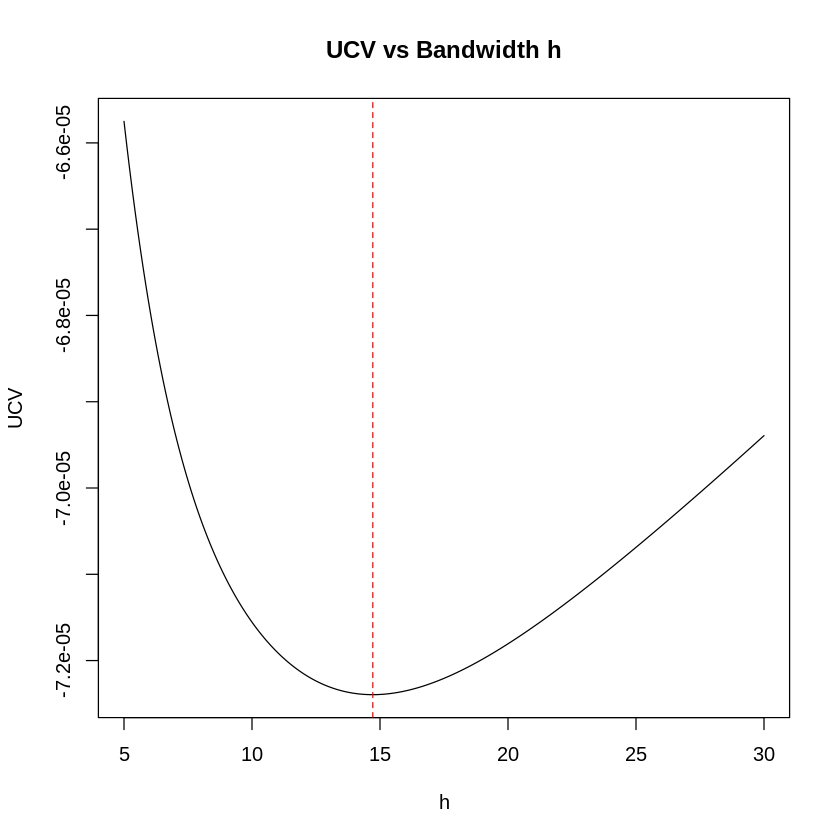

In [6]:
gaussian_kernel <- function(u)
{
  return((1/sqrt(2*pi)) * exp(-0.5 * u^2))
}

leave_one_out_kde <- function(x, left_out_index, h, kernel_function, data)
{
  data <- data[-left_out_index]
  return(kernel_estimator(x, h, kernel_function, data))
}

kernel_estimator <- function(x,h,kernel,data)
{
  n <- length(data)
  estimated <- sum(sapply(data, function(xi) kernel((x - xi)/h)))
  return((1/(n*h)) * estimated)
}
ucv <- function(h, kernel_function, data)
{
  n <- length(data)
  termino1 <- sum(sapply(data, function(x) kernel_estimator(x, h, kernel_function, data)^2)) / n
  termino2 <- mean(sapply(1:n, function(i) leave_one_out_kde(data[i], i, h, kernel_function, data)))
  return(termino1 - 2/n * termino2)
}

data <- read.csv("Tratamiento.csv")
h_values <- seq(5, 30, length.out = 500)

ucv_values <- sapply(h_values, ucv, kernel_function = gaussian_kernel, data = data$X1)

optimal_h <- h_values[which.min(ucv_values)]

print(optimal_h)

plot(h_values, ucv_values, type = "l", main = "UCV vs Bandwidth h", xlab = "h", ylab = "UCV")
abline(v = optimal_h, col = "red", lty = 2)
